# Notebook using the Washington Post Fatal Shoots dataset

https://github.com/washingtonpost/data-police-shootings

This work is not meant to convey an opinion but to use the dataset and explore the data

# Perform Initial Data Load and Clean Up

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import numpy as np

In [147]:
pd.set_option("max_rows", 200)

In [148]:
df = pd.read_csv("./data/fatal-police-shootings-data.csv")

In [149]:
df.shape

(6735, 17)

In [150]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [151]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

Notice date is an 'object', convert that to datetime

In [152]:
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [153]:
df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
year                                int64
month                               int64
dtype: object

What are the min / max dates and what time range does this data cover?

In [154]:
min_date = df.date.min()
min_date

Timestamp('2015-01-02 00:00:00')

In [155]:
max_date =df.date.max()
max_date

Timestamp('2021-11-16 00:00:00')

In [156]:
time_range = max_date - min_date
time_range.days/365

6.876712328767123

Drop the 'id' column

In [157]:
df = df.drop(columns=['id'])

In [158]:
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1


Look for missing data

In [159]:
df.isna().sum()

name                       272
date                         0
manner_of_death              0
armed                      206
age                        326
gender                       5
race                       882
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       520
body_camera                  0
longitude                  321
latitude                   321
is_geocoding_exact           0
year                         0
month                        0
dtype: int64

In [160]:
# missing values percentage
df.isna().mean().round(4) * 100

name                        4.04
date                        0.00
manner_of_death             0.00
armed                       3.06
age                         4.84
gender                      0.07
race                       13.10
city                        0.00
state                       0.00
signs_of_mental_illness     0.00
threat_level                0.00
flee                        7.72
body_camera                 0.00
longitude                   4.77
latitude                    4.77
is_geocoding_exact          0.00
year                        0.00
month                       0.00
dtype: float64

<AxesSubplot:>

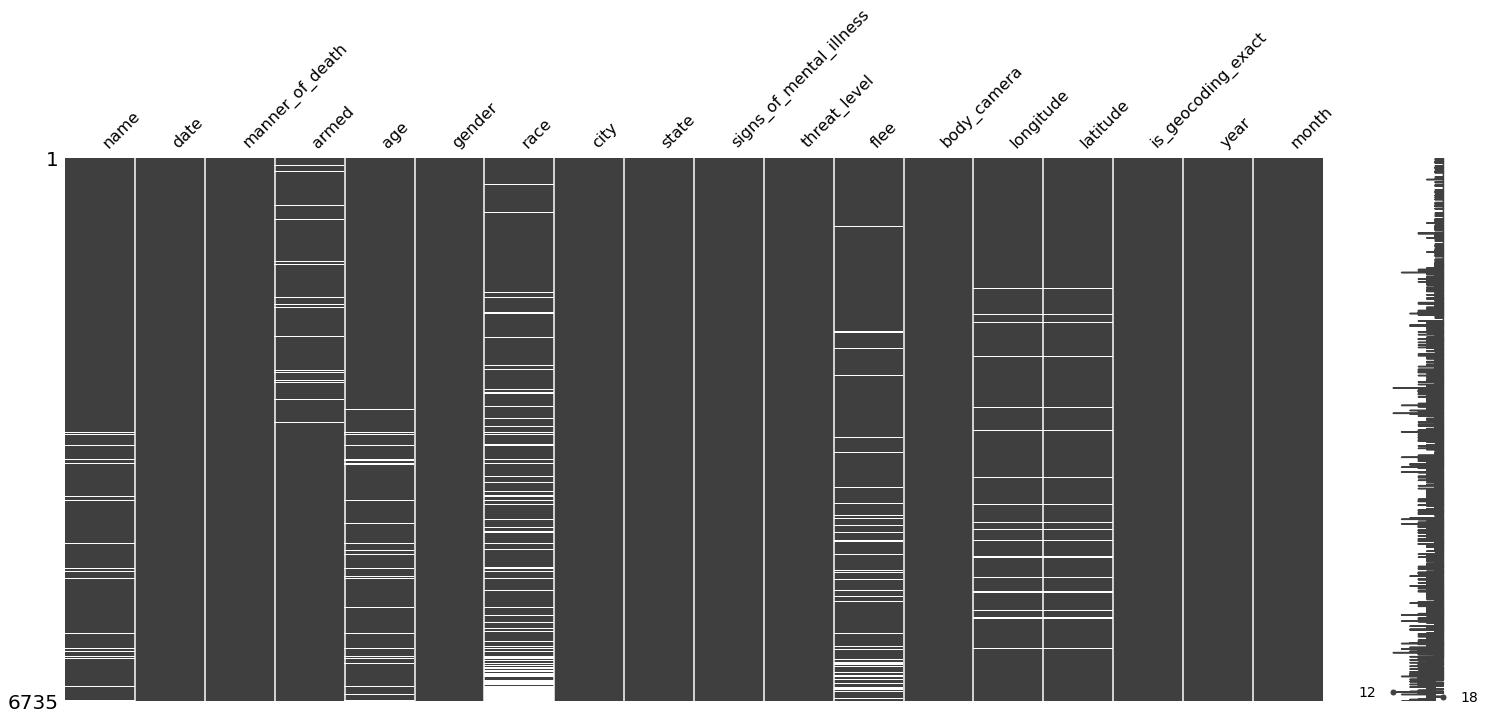

In [161]:
msno.matrix(df)

In [162]:
df.dropna().shape

(4939, 18)

In [163]:
df = df.drop(columns=['name'])

In [164]:
df.dropna().shape

(4951, 17)

In [165]:
df.query("age.isna()")

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
127,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False,-95.401,29.983,True,2015,2
769,2015-10-12,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False,-98.422,34.599,True,2015,10
809,2015-10-24,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False,-74.080,41.747,True,2015,10
819,2015-10-29,shot,gun,NaN,M,B,Columbus,OH,False,other,Not fleeing,False,-82.863,39.922,True,2015,10
932,2015-12-10,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False,-116.971,33.729,True,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,2021-11-06,shot,undetermined,NaN,M,NaN,Henrico County,VA,False,undetermined,NaN,False,-76.861,37.495,True,2021,11
6725,2021-11-06,shot,gun,NaN,M,NaN,Long Branch,NJ,False,attack,Not fleeing,False,-73.991,40.300,True,2021,11
6728,2021-11-07,shot,gun,NaN,M,NaN,Knowlton Township,NJ,False,attack,Not fleeing,False,-75.108,40.948,True,2021,11
6729,2021-11-08,shot,gun,NaN,M,NaN,Renton,WA,False,other,Not fleeing,False,-122.223,47.474,True,2021,11


It will be difficult to impute any of the missing values,therefore lets drop all rows with any missing values

In [166]:
df.dropna(inplace=True)

In [167]:
df.shape

(4951, 17)

Check that we have no missing data

In [168]:
df.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
year                       0
month                      0
dtype: int64

# Initial Exploratory Analysis

Column Value Counts

In [169]:
df.columns

Index(['date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
       'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'longitude', 'latitude', 'is_geocoding_exact', 'year',
       'month'],
      dtype='object')

<AxesSubplot:>

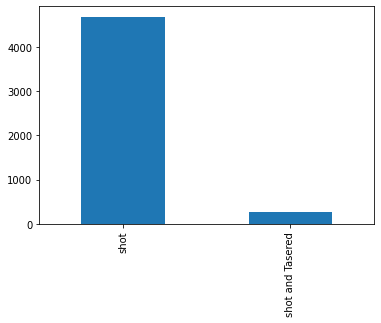

In [170]:
df.manner_of_death.value_counts().plot(kind='bar')

In [171]:
df.armed.value_counts()

gun                                 2911
knife                                756
unarmed                              376
toy weapon                           193
vehicle                              164
undetermined                          93
unknown weapon                        53
machete                               42
Taser                                 26
sword                                 22
baseball bat                          17
hammer                                16
ax                                    16
gun and knife                         14
gun and vehicle                       14
metal pipe                            13
screwdriver                           13
sharp object                          12
box cutter                            12
hatchet                               11
gun and car                            9
BB gun                                 9
scissors                               8
piece of wood                          7
pipe            

In [172]:
df.armed.value_counts(normalize=True)

gun                                 0.587962
knife                               0.152696
unarmed                             0.075944
toy weapon                          0.038982
vehicle                             0.033125
undetermined                        0.018784
unknown weapon                      0.010705
machete                             0.008483
Taser                               0.005251
sword                               0.004444
baseball bat                        0.003434
hammer                              0.003232
ax                                  0.003232
gun and knife                       0.002828
gun and vehicle                     0.002828
metal pipe                          0.002626
screwdriver                         0.002626
sharp object                        0.002424
box cutter                          0.002424
hatchet                             0.002222
gun and car                         0.001818
BB gun                              0.001818
scissors  

Lets consolidate the armed values to: gun, knife, unarmed, other

In [173]:
conditions = [
    (df['armed']=='gun'),
    (df['armed']=='knife'),
    (df['armed']=='unarmed'),
    (df['armed']!='gun') & (df['armed']!='knife') & (df['armed']!='unarmed')
]
values=['gun', 'knife', 'unarmed', 'other']
df['armed_agg'] = np.select(conditions, values)

In [174]:
conditions = [
    (df['armed']!='unarmed'),
    (df['armed']=='unarmed'),
]
values=[1, 0]
df['was_armed'] = np.select(conditions, values)

In [175]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,armed_agg,was_armed
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,gun,1
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,gun,1
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,unarmed,0
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,other,1
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,other,1


In [176]:
df.armed_agg.value_counts(normalize=True)

gun        0.587962
other      0.183397
knife      0.152696
unarmed    0.075944
Name: armed_agg, dtype: float64

<AxesSubplot:>

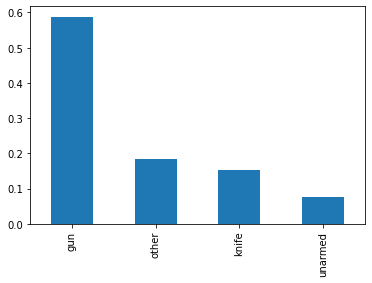

In [177]:
df.armed_agg.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

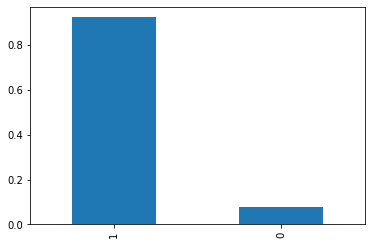

In [194]:
df.was_armed.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

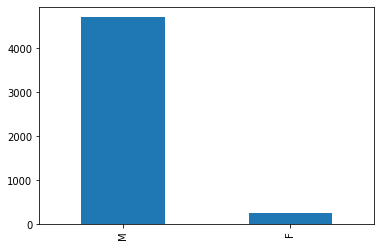

In [178]:
df.gender.value_counts().plot(kind='bar')

<AxesSubplot:>

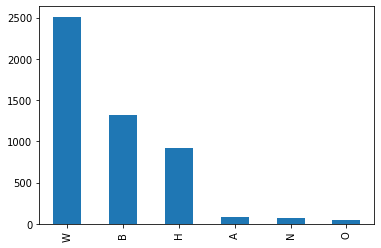

In [179]:
df.race.value_counts().plot(kind='bar')

<AxesSubplot:>

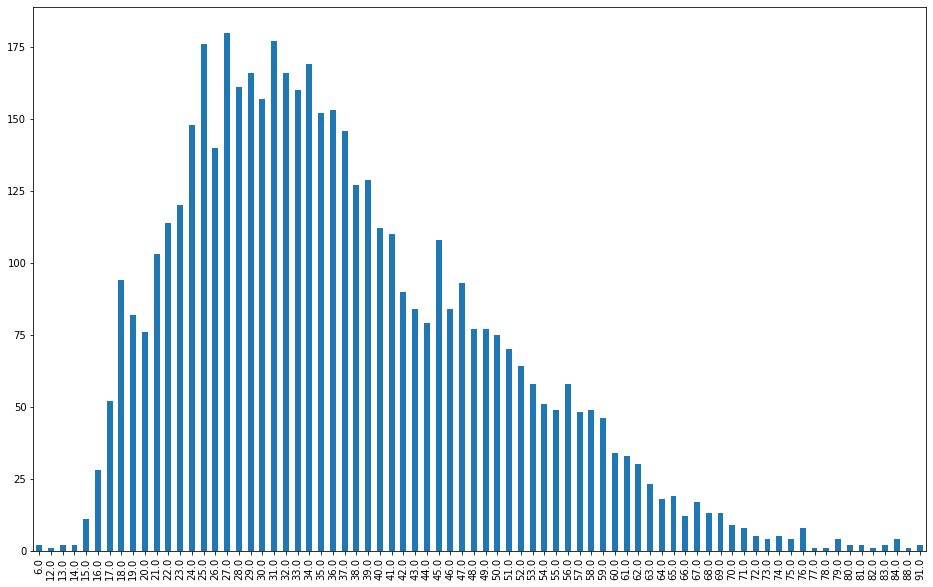

In [180]:
df.age.value_counts().sort_index().plot(kind='bar', figsize=(16,10))

In [181]:
df.age.describe()

count    4951.000000
mean       36.667542
std        12.760710
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

<AxesSubplot:>

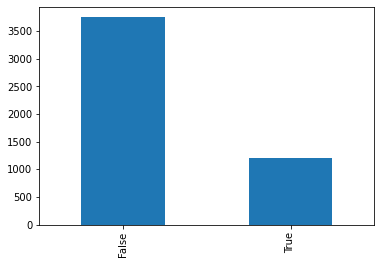

In [182]:
df.signs_of_mental_illness.value_counts().plot(kind="bar")

In [183]:
df.threat_level.value_counts()

attack          3264
other           1576
undetermined     111
Name: threat_level, dtype: int64

In [184]:
df.flee.value_counts()

Not fleeing    3290
Foot            736
Car             730
Other           195
Name: flee, dtype: int64

In [185]:
df.body_camera.value_counts()

False    4243
True      708
Name: body_camera, dtype: int64

In [186]:
df.date.dt.year.value_counts().sort_index()

2015    913
2016    801
2017    763
2018    764
2019    743
2020    691
2021    276
Name: date, dtype: int64

<AxesSubplot:>

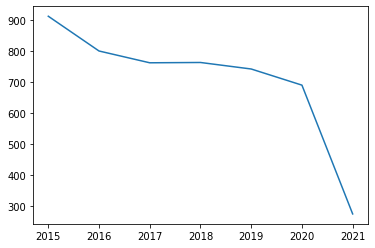

In [187]:
df.date.dt.year.value_counts().sort_index().plot()

In [193]:
# by itself these numbers do not mean much.  They need to be normalized to the population
# of the state
df.state.value_counts()

CA    734
TX    427
FL    344
AZ    214
GA    179
CO    176
OK    148
OH    146
NC    145
TN    132
WA    127
MO    118
IL    107
PA    101
IN     99
LA     94
NY     93
NM     93
VA     93
AL     91
NV     87
WI     86
KY     84
MD     81
MI     81
OR     79
SC     73
AR     65
MN     62
MS     61
UT     60
NJ     54
KS     52
ID     42
WV     36
MA     32
IA     31
AK     31
NE     26
MT     25
HI     23
ME     17
DC     17
CT     17
NH     14
WY     13
SD     12
DE     11
ND      9
VT      7
RI      2
Name: state, dtype: int64

# Analysis

In [189]:
df['race']

0       A
1       W
2       H
3       W
4       H
       ..
6615    B
6620    B
6632    H
6674    W
6681    W
Name: race, Length: 4951, dtype: object

In [190]:
df.groupby(['state', 'city'])['age'].count()

state  city       
AK     Anchorage      9
       Barrow         1
       Eagle River    1
       Fairbanks      9
       Houston        1
                     ..
WY     Cheyenne       2
       Douglas        2
       Gillette       2
       Laramie        1
       Riverton       1
Name: age, Length: 2537, dtype: int64

In [191]:
df[['race', 'signs_of_mental_illness']].groupby(['race'])['signs_of_mental_illness'].value_counts()


race  signs_of_mental_illness
A     False                        63
      True                         25
B     False                      1102
      True                        220
H     False                       746
      True                        169
N     False                        59
      True                         14
O     False                        32
      True                         10
W     False                      1746
      True                        765
Name: signs_of_mental_illness, dtype: int64

By year, show the number of armed people killed by race.

<AxesSubplot:xlabel='year', ylabel='count'>

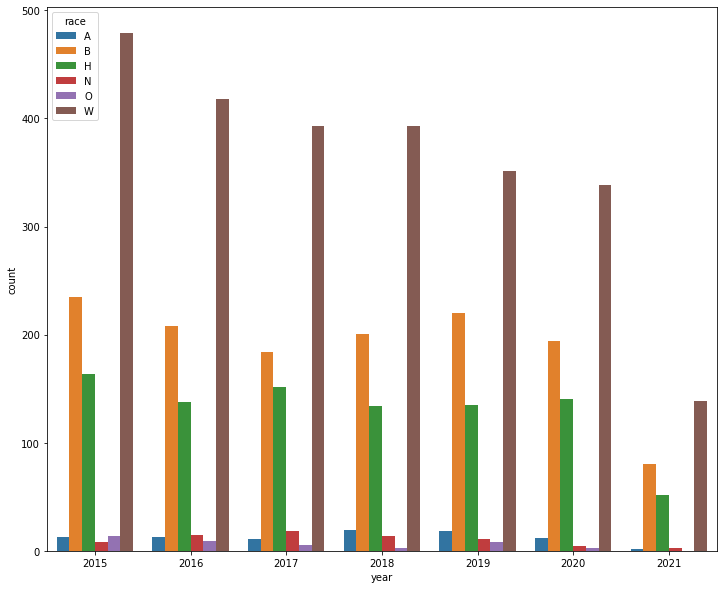

In [192]:
x = df[['year', 'race', 'was_armed']].groupby(['year', 'race'])['was_armed'].count()
x = x.reset_index(name='count')
fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(x="year",
           y="count",
           hue="race",
           data=x,
           ax=ax)

